In [421]:
%pip install nltk
%pip install openpyxl
%pip install contractions
%pip install inflect
%pip install spacy
%pip install gensim
%pip install scikit-optimize
%python -m spacy download es_core_news_md
!python -m spacy download es_core_news_md

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [422]:
import numpy as np
import pandas as pd
import nltk
import openpyxl

import re, string, unicodedata
import contractions
import inflect


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from skopt import BayesSearchCV
from skopt.space import Real, Integer


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin

In [423]:
import spacy
nlp = spacy.load("es_core_news_md")  # Cargar el modelo de spaCy en español

Para este caso lo primero que vamos a realizar es una importancion de los modelos necesarios para poder realizar la division de los textos. En este caso, se sabe que la mayoria de librerias se encuentran en ingles. Por esta razon, es necesario realizar y encontrar las librerias spaCy del modelo, para lograr realizar el analisis de textos en español.

In [424]:
import warnings
warnings.filterwarnings("ignore")

En este punto, es importatnte hacer caso omiso a las alertas en python.

In [425]:
pd.set_option("display.max_colwidth", None)

Para este caso, solo es necesario hacer que para la impresion se toque los outputs de python para poder ver todo el contenido de las celdas, ya que se esta hablando de opiniones un poco largas.

In [426]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger") 

stop_words = stopwords.words("spanish")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


En este punto se esta realizando, ya algo mas profundo en terminos del desarrollo del analisis de los textos. Para este punto, lo que se esta haciendo es defnir esa palabras que realizan un cierto aporte en el analisis, sobre los textos. En este caso, como la mayoria de librerias son desarrolladas en ingles es necesario realizar la busqueda o adaptacion de estas mismas a español

In [427]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [428]:
# Uso de la libreria pandas para la lectura de archivos
data = pd.read_excel('./data/cat_345.xlsx')
# Asignación a una nueva variable de los datos leidos
df_obj=data


En este punto, lo unico que se esta haciendo es la lectura del archivo, para poder cargar la informacion en un dataframe de la libreria de pandas

### 1. Limpieza de datos

##### 1.1 Entendimiento de datos

In [429]:
df_obj.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

In [430]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  3000 non-null   object
 1   sdg             3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Como podemos ver en este dataframe, resultante del analisis de textos, encontramos muy pocas columnas. En un primer momento, se puede ver el id organizador. Luego, encontramos el pilar de este analisis, que es la columna de opiniones de las personas sobre los objetivos de desarrollo. Por ultimo, encontramos la columna, que define a que objetivo de desarrollo sostenible hace referencia la opinion añadida en la columna anterior.

In [431]:
df_obj.describe()

,sdg
count,3000.000000
mean,4.000000
std,0.816633
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Para el caso de la unica columna numerica, realizamos un análisis numerico. Sin embargo, es necesario recordar que esta es una columna numerica, de tipo categorico. Esto quiere decir, que realmente no representa numeros como tal, sino categorias. Para el caso de proyecto estos numeros van a ser tomados como los objetivos de desarrollo sostenible asignado a la informacion. Para el analsis se encontraron 3000 registros. Con una media de 4. Luego una desviacion de 0.81. Luego, una valor minimo de 3 ( que es el objetivo de desarrollo 3). Y por utlimo, una valor maximo de 5 (otro boejtivo de desarrollo).

In [432]:
name_cols_non_number = df_obj.select_dtypes(include = ['object']).columns
df_obj[name_cols_non_number].describe()

,Textos_espanol
count,3000
unique,3000
top,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP."
freq,1


Para este punto realizar este análisis de tipo no numerico, realmente no aporta en nada. Sin embargo, se realiza por motivos de organizacion y de respetar la estructura de los analsis. En este punto, se puede decir que todos los valores de la columna de opiniones son unicos, es decir, o existe nigun valor parecido a otro por lo que esta parte va a ser porque cada opinion que aparece va a ser relevante con el mismo porcentaje de importancia. 

In [433]:
df_obj["sdg"].value_counts(dropna=False, normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

En este caso, vemos que la distribucion de datos, frente a los objetivos de desarrollo es equitativa. Esto se debe a que las opiniones estan distribuidas entre los tres objetivos de desarrollo

#### 1.2 Calidad de datos

##### 1.2.1 Completitud

In [434]:
((df_obj.isnull().sum()/df_obj.shape[0])).sort_values(ascending=False)

Textos_espanol    0.0
sdg               0.0
dtype: float64

Como podemos ver no existe nigun valor nulo, en los datos que fueron presentados por lo que no deberia tomarse ninguna decision sobre si si o si no se deben tomar en cuenta, puesto que no hay variedad.

##### 1.2.2 Unicidad

In [435]:
df_obj.duplicated(keep = False).sum()

0

Como se puede ver no existen valores duplicados. Esto es que la informacion tiene muy buena cantidad de variedad para evaluar. Por esta razon, no es necesario quitar los valores duplicados.

##### 1.2.3 Consistencia

In [436]:
df_obj["sdg"].describe()

count    3000.000000
mean        4.000000
std         0.816633
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: sdg, dtype: float64

En este caso, se puede ver que todos los valores cumplen con los rangos dentro de los rangos preedifinidos por los datos. Por ende se dice que estan bien definidos los rangos.

##### 1.2.3 Validez

En este punto, no es necesario analizar, esta opcion. Esto se debe a que los datos han cumplidos con todos los formatos. Ademas, que las columnas no tiene ningun tipo de relacion entre si por lo que no se puede decir que incumplen los valores.

#### 1.3 Preparacion de datos

In [437]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words
    """Convert all characters to lowercase from list of tokenized words"""

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    stop_words = set(stopwords.words("spanish"))
    new_words = [word for word in words if word not in stop_words]
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

En este punto, se definen las funciones o transformaciones necesarias para analizar el texto. En primer lugar, se llevará a cabo una transformación relacionada con el formato ASCII. Esta transformación tiene como objetivo eliminar símbolos o caracteres que no estén en formato ASCII o que no se asemejen a él. Luego, para evitar comparaciones entre palabras idénticas pero con diferencias en mayúsculas y minúsculas, se realizará una transformación que convertirá todo el texto a minúsculas, lo que facilitará el análisis. Posteriormente, se eliminarán los puntos, comas y punto y comas, con el propósito de que el texto sea lo más puro posible y se enfoque exclusivamente en el contenido. Después, se abordará la necesidad de suprimir los números, sustituyéndolos por palabras, con el fin de que no influyan en el análisis. Por último, se abordará el concepto previamente mencionado de "stopwords". En este caso, se eliminarán estas palabras recurrentes que no aportan al análisis y pueden volverlo denso.

In [438]:
df_obj['Textos_espanol'] = df_obj['Textos_espanol'].apply(contractions.fix) #Aplica la corrección de las contracciones

df_obj['Textos_Tokenizados'] = df_obj['Textos_espanol'].apply(contractions.fix)  # Aplica la corrección de las contracciones
df_obj['Textos_Tokenizados'] = df_obj['Textos_espanol'].apply(preprocessing)  # Aplica la eliminación del ruido
df_obj['Textos_Tokenizados'] = df_obj['Textos_espanol'].apply(word_tokenize)  # Tokeniza las palabras

df_obj.head()

,Textos_espanol,sdg,Textos_Tokenizados
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[Por, ejemplo, ,, el, nÃºmero, de, consultas, externas, de, especialistas, es, de, 319, por, cada, mil, derechohabientes, en, el, SP, ,, en, comparaciÃ³n, con, 338, y, 620, por, cada, mil, derechohabientes, en, el, IMSS, y, el, ISSSTE, ,, respectivamente, ., Si, bien, algunas, de, estas, diferencias, pueden, reflejar, una, necesidad, desigual, (, como, la, poblaciÃ³n, ligeramente, mayor, del, ISSSTE, ), ,, otras, no, pueden, justificarse, de, esta, manera, ., El, nÃºmero, de, recetas, que, no, pudieron, ser, surtidas, en, su, totalidad, por, un, farmacÃ©utico, debido, a, la, falta, de, existencias, es, de, 33, %, dentro, del, SP, en, comparaciÃ³n, con, ...]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[En, 2007, ,, el, gobierno, central, financió, directamente, solo, el, 0,3, %, del, gasto, total, en, salud, ,, pero, realizó, transferencias, específicas, para, el, gasto, en, salud, que, ascendieron, a, otro, 5,6, %, del, gasto, total, ., La, mayor, parte, del, gasto, presupuestario, en, salud, lo, realizan, los, gobiernos, de, los, condados, ., Por, lo, tanto, ,, los, condados, pobres, solo, pueden, ofrecer, un, bajo, nivel, de, atención, a, la, población, local, ., El, gobierno, provincial, proporciona, subsidios, del, lado, de, la, oferta, a, los, hospitales, .]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[Claramente, ,, hay, muchos, otros, factores, en, juego, ,, en, part

En este punto, se aplica las transformaciones realizadas anteriormente.

### 2. Division de datos

In [439]:
# The param 'stratify' is useful to guarantee label proportions on train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_obj[["Textos_espanol"]], df_obj["sdg"], test_size=0.3, stratify=df_obj["sdg"], random_state=1)

En este punto se dividen los datos de entrenamiento y los de prueba respectivamente

In [440]:
X_train.shape, X_test.shape

((2100, 1), (900, 1))

Como podemos ver al sumarlos encontramos que entre ambos conjuntos de datos existe una totalidad de 3000 datos. Pero al haber seleccionado que los de prueba fueran el 30 por ciento, se van a escoger 9000 para luego, hacer las comparaciones de resultados.

In [441]:
pd.Series(y_train).value_counts(normalize=True)

sdg
4    0.333333
3    0.333333
5    0.333333
Name: proportion, dtype: float64

En este caso volvemos a ver que la reparticion de los objetivos de desarrollo con sus respectiva opiniones es muy equitativa

In [442]:
pd.Series(y_test).value_counts(normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

En este caso volvemos a ver que la reparticion de los objetivos de desarrollo con sus respectiva opiniones es muy equitativa

### 3. Modelado y evaluacion

### 3.1 Vectorizacion BoW

In [443]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [444]:
X_bow = bow.fit_transform(X_train["Textos_espanol"])

En la técnica de Bag of Words, realizamos la tokenización para organizar las palabras de acuerdo a una tabla que se genera internamente en el algoritmo.

In [445]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 15550


Como podemos ver se encontraron o se creo un vocabulario de 15550 palabras

### 3.1.1 BoW con clasificacion Random Forest Classifier

In [446]:
bow_model = RandomForestClassifier(random_state=2)

Se crea el clasificador para poder trabajar con el modleo de BOW, es decir, con random state en 2

In [447]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

Se entre el modleo con los datos de bow y los resultados de entranimiento

<Axes: >

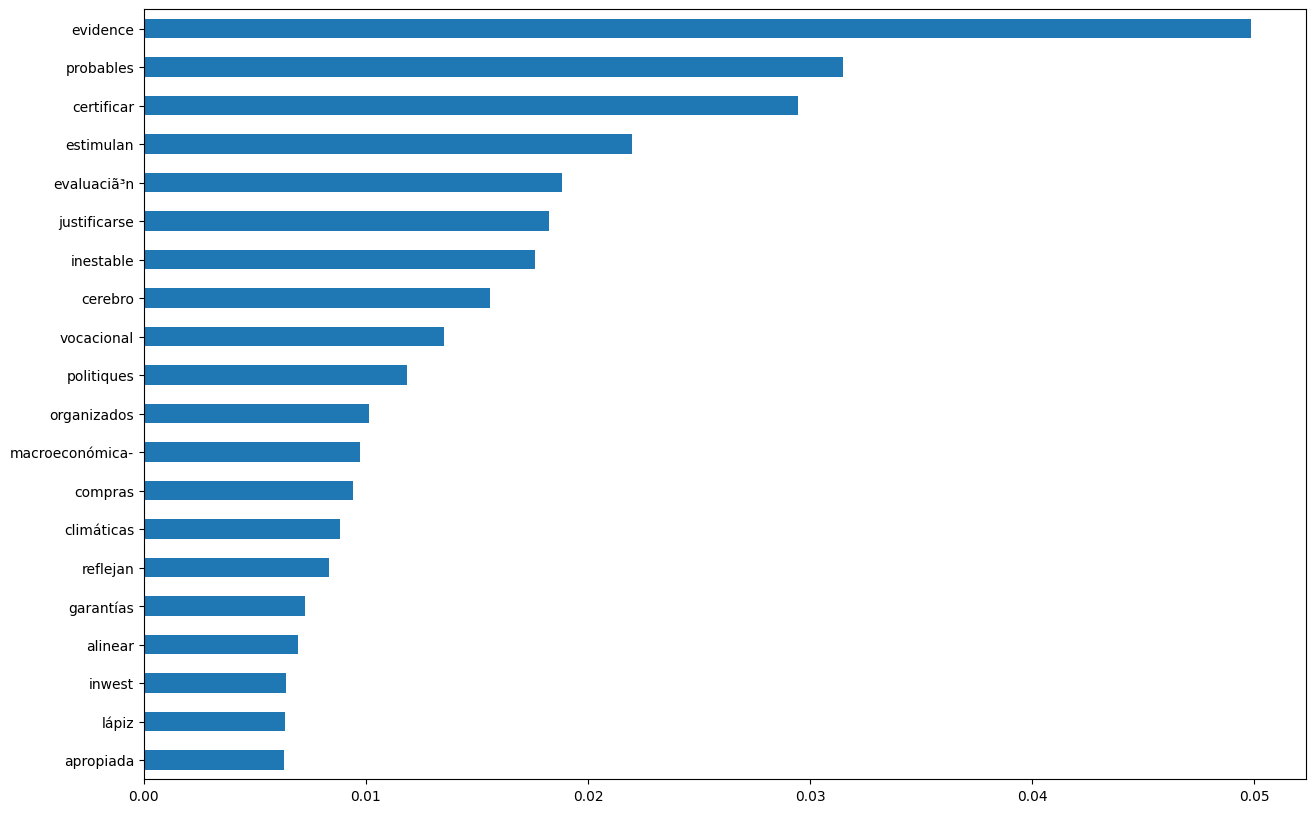

In [448]:
# Feature importance in tree models is an indicator on how relevant is a feature for taking the decision by the model
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

En este punto, se realiza una descripcion grafica de la importancia en los datos para poder realizar una decision dentro de la clasificacion. Como se puede ver evidence es  la palabra o el concepto que mas importancia tiene con una porcentaje e maso menos 0.05  o un 0.5 porciento. Dentro del modelo

In [449]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 101.74


Como se puede ver se desarrollaron casi 100 arboles, y tenian todos una profundiad o su ultimo nivel era maso menos en el 101.74

In [450]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test["Textos_espanol"]))

Ahora se realizan una predicciones basada en en el modelo que se entreno

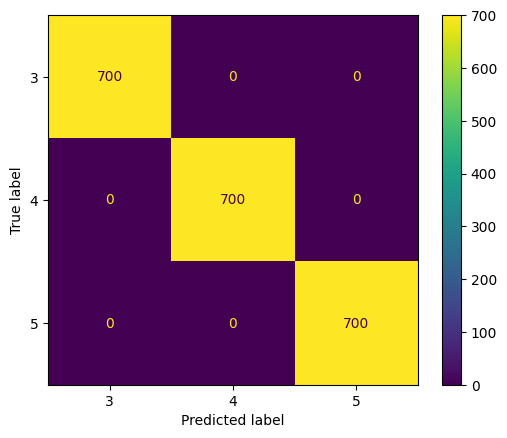

In [451]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

Como se puede ver se estan haciendo predicciones casi perfectas. Donde todos se ubican en la diagonal de la matriz de confusiones, queriendo decir que el modelo esta siendo muy bueno.

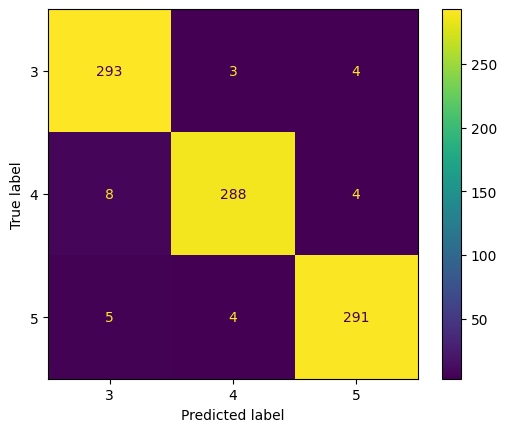

In [452]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

Luego, para el caso de las prediciones realizadas, se puede ver que el modelo falla en algunas ocasiones. Sin embargo, su mayor densidad se encuentra en la diagonal, por lo que le modelo esta siendo realmente positivo.

In [453]:
print("Precision:", precision_score(y_train, y_train_bow_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_bow_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_bow_predict, average='weighted'))

Precision: 1.0
Recall: 1.0
F1: 1.0


En este caso, se obtuvo una precision o mas bien se obtuvo un error global del 0%. Lo que quiere decir que el modelo fue perfecto, con los datos de entranimiento.

In [454]:
print("Precision:", precision_score(y_test, y_test_bow_predict,average='weighted'))
print("Recall:", recall_score(y_test, y_test_bow_predict,average='weighted'))
print("F1:", f1_score(y_test, y_test_bow_predict,average='weighted'))

Precision: 0.9690105578223832
Recall: 0.9688888888888889
F1: 0.9688944307233576


Para este caso, se puede ver que el error global rodan el 4% maso menos. Eso quiere decir, que el modelo esta siendo casi perfecto. Sin embargo, el error es tan pequeño que el modelo esta siendo muy bueno, sin importar las variables que se estan realizando

### 3.1.2 BoW con clasificacion Regresion logisitca

Precision: 0.973375693574369
Recall: 0.9733333333333334
F1: 0.9733327387455686


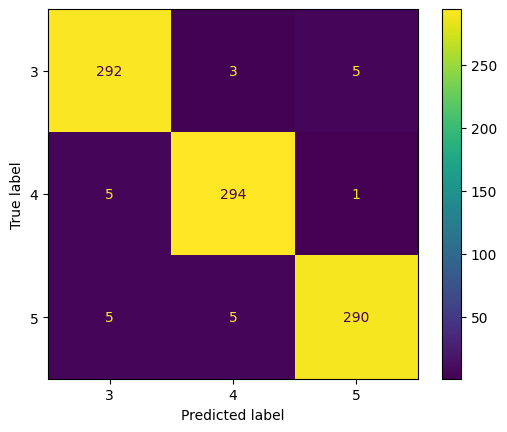

In [455]:
# Crea un modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=5, max_iter=1000)

# Entrena el modelo con los vectores de características generados por Doc2Vec
logistic_model.fit(X_bow, y_train)

# Realiza predicciones en los datos de prueba
y_test_logistic_predict = logistic_model.predict(bow.transform(X_test["Textos_espanol"]))

# Calcula las métricas de evaluación
precision_logistic = precision_score(y_test, y_test_logistic_predict, average='weighted')
recall_logistic = recall_score(y_test, y_test_logistic_predict, average='weighted')
f1_logistic = f1_score(y_test, y_test_logistic_predict, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test, y_test_logistic_predict)

print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1:", f1_logistic)

En este punto lo que se esta haciendo, es primero el entreno de los datos. En este punto, seguimos probando con la vectorizacion de Bow. Se realiza el entreno el modelo para regresion logistica. Luego, se realiza la prediccion. Y por ultimo se obtuvo que los resultados en el error vuelve a hacer un poco menos el 3 %. Por lo que el modelo es muy valido para su eleccion

### 3.1.3 BoW con clasificacion SVM

Precision (SVM): 0.9689773186414992
Recall (SVM): 0.9688888888888889
F1 (SVM): 0.9688951610660462


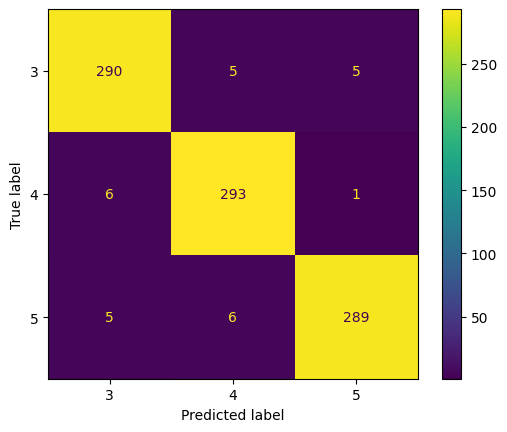

In [456]:
# Crea un modelo de Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=5)

# Entrena el modelo con los vectores de características generados por Doc2Vec
svm_model.fit(X_bow, y_train)

# Realiza predicciones en los datos de prueba
y_test_svm_predict = svm_model.predict(bow.transform(X_test["Textos_espanol"]))

# Calcula las métricas de evaluación
precision_svm = precision_score(y_test, y_test_svm_predict, average='weighted')
recall_svm = recall_score(y_test, y_test_svm_predict, average='weighted')
f1_svm = f1_score(y_test, y_test_svm_predict, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 (SVM):", f1_svm)

En este punto lo que se esta haciendo, es primero el entreno de los datos. En este punto, seguimos probando con la vecotrizacion de Bow. Se realiza el entreno el modelo para SVM. Luego, se realiza la prediccion. Y por ultimo se obtuvo que los resultados en el error vuelve a hacer un poco menos el 4 %. Por lo que el modelo es muy valido para su eleccion

### 3.2 Vectorizacion TFID

In [457]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [458]:
X_tfidf = tfidf.fit_transform(X_train["Textos_espanol"])

Realizamos la tokenizacion de en la TFID, organizando las palabras  detras del algoritmo

In [459]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 15550


Como podemos ver se encontraron o se creo un vocabulario de 15550 palabras

### 3.2.1 Modelo Clasificacion Random Forest Classifier con TF-IDF

In [460]:
tfidf_model = RandomForestClassifier(random_state=3)

Se crea el clasificador para poder trabajar con el modelo de TF IDF, es decir, con random state en 3

In [461]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

Se entre el modleo con los datos de bow y los resultados de entranimiento

<Axes: >

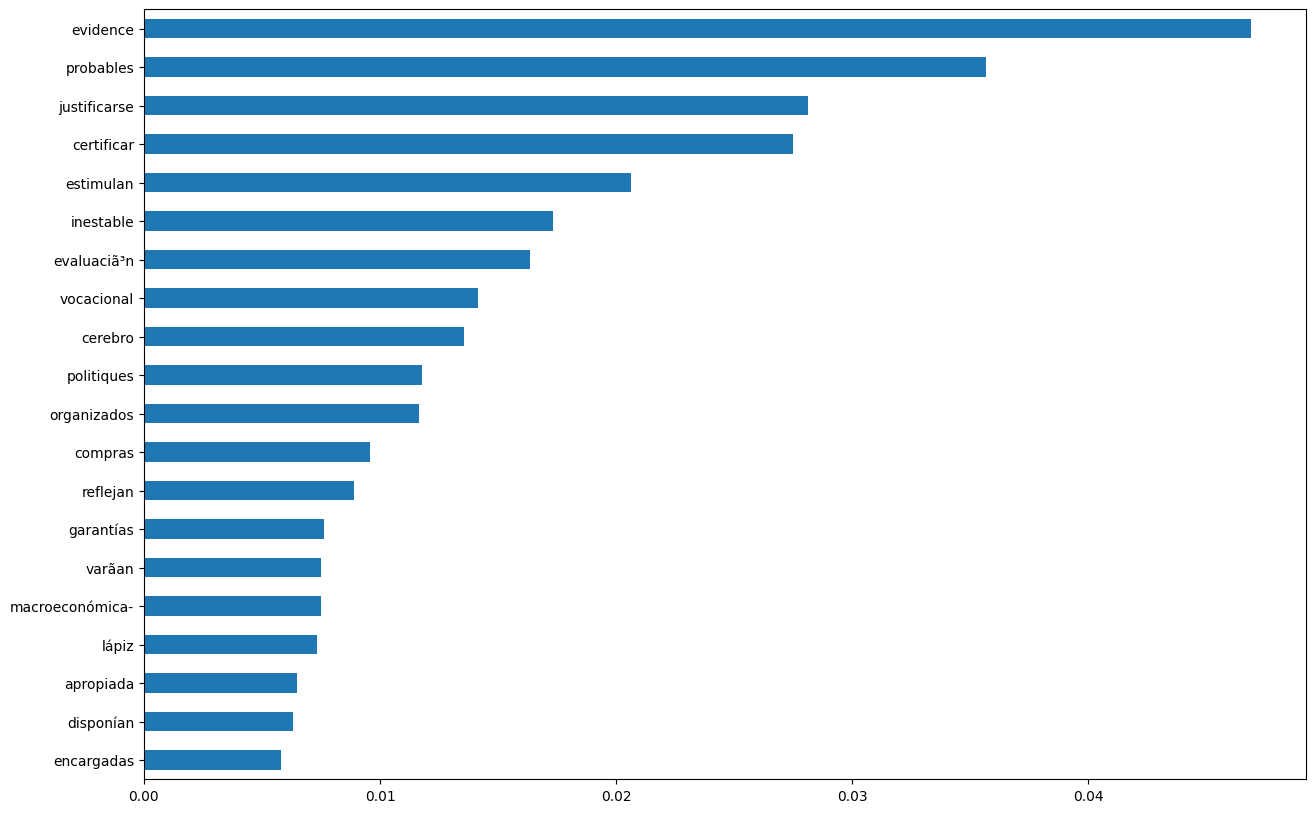

In [462]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

En este punto, se realiza una descripcion grafica de la importancia en los datos para poder realizar una decision dentro de la clasificacion. Como se puede ver evidence es  la palabra o el concepto que mas importancia tiene con una porcentaje e maso menos 0.05  o un 0.5 porciento. Dentro del modelo

In [463]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 97.87


Como se puede ver se desarrollaron casi 100 arboles, y tenian todos una profunidad o su ultimo nivel era maso menos en el 97.87

In [464]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test["Textos_espanol"]))

Ahora se realizan una predicciones basadas en en el modelo que se entreno

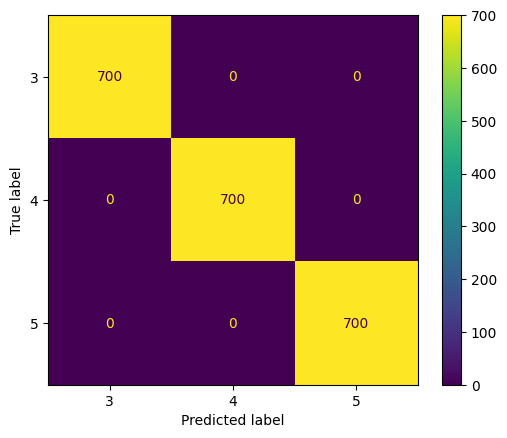

In [465]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

Como se puede ver se estan haciendo predicciones casi perfectas. Donde todos se ubican en la diagonal de la matriz de confusiones, queriendo decir que el modelo esta siendo muy bueno.

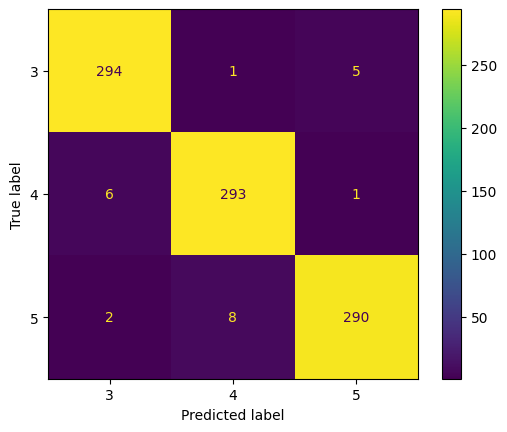

In [466]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

Luego, para el caso de las prediciones realizadas, se puede ver que el modelo falla en algunas ocasiones. Sin embargo, su mayor densidad se encuentra en la diagonal, por lo que le modelo esta siendo realmente positivo.

In [467]:
print("Precision:", precision_score(y_train, y_train_tfidf_predict,average='weighted'))
print("Recall:", recall_score(y_train, y_train_tfidf_predict,average='weighted'))
print("F1:", f1_score(y_train, y_train_tfidf_predict,average='weighted'))

Precision: 1.0
Recall: 1.0
F1: 1.0


En este caso, se obtuvo una precision o mas bien se otibvuo un error global del 0%. Lo que quiere decir que el modelo fue perfecto, con los datos de entrenamiento.

In [468]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict,average='weighted'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict,average='weighted'))
print("F1:", f1_score(y_test, y_test_tfidf_predict,average='weighted'))

Precision: 0.9744794463337509
Recall: 0.9744444444444444
F1: 0.9744401584576394


Para este caso, se puede ver que el error global rodan el 3% maso menos. Eso quiere decir, que el modelo esta siendo casi perfecto. Sin embargo, el error es tan pequeño que el modelo esta siendo muy bueno, sin importar las variables que se estan realizando

### 3.2.2 Modelo Clasificacion Regresion logistica con TF-IDF

Precision: 0.975583199093133
Recall: 0.9755555555555555
F1: 0.9755475781697103


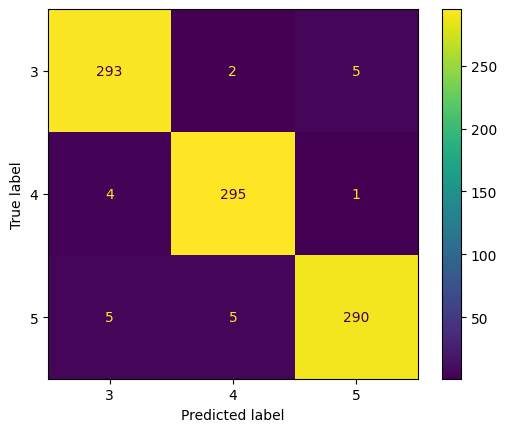

In [469]:
# Crea un modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=5, max_iter=1000)

# Entrena el modelo con los vectores de características generados por Doc2Vec
logistic_model.fit(X_tfidf, y_train)

# Realiza predicciones en los datos de prueba
y_test_logistic_predict = logistic_model.predict(tfidf.transform(X_test["Textos_espanol"]))

# Calcula las métricas de evaluación
precision_logistic = precision_score(y_test, y_test_logistic_predict, average='weighted')
recall_logistic = recall_score(y_test, y_test_logistic_predict, average='weighted')
f1_logistic = f1_score(y_test, y_test_logistic_predict, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test, y_test_logistic_predict)


print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1:", f1_logistic)

En este punto lo que se esta haciendo, es primero el entreno de los datos. En este punto, seguimos probando con la vectorizacion de TFIDF. Se realiza el entreno el modelo para regresion logistica. Luego, se realiza la prediccion. Y por ultimo se obtuvo que los resultados en el error vuelve a hacer un poco menos el 3 %. Por lo que el modelo es muy valido para su eleccion

### 3.2.3 Modelo Clasificacion SVM con TF-IDF

Precision (SVM): 0.9755766134943711
Recall (SVM): 0.9755555555555555
F1 (SVM): 0.9755533850811927


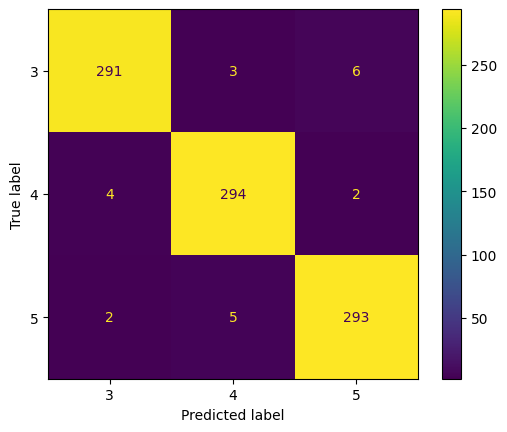

In [470]:
# Crea un modelo de Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=5)

# Entrena el modelo con los vectores de características generados por Doc2Vec
svm_model.fit(X_tfidf, y_train)

# Realiza predicciones en los datos de prueba
y_test_svm_predict = svm_model.predict(tfidf.transform(X_test["Textos_espanol"]))


# Calcula las métricas de evaluación
precision_svm = precision_score(y_test, y_test_svm_predict, average='weighted')
recall_svm = recall_score(y_test, y_test_svm_predict, average='weighted')
f1_svm = f1_score(y_test, y_test_svm_predict, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 (SVM):", f1_svm)

En este punto lo que se esta haciendo, es primero el entreno de los datos. En este punto, seguimos probando con la vecotrizacion de Bow. Se realiza el entreno el modelo para SVM. Luego, se realiza la prediccion. Y por ultimo se obtuvo que los resultados en el error vuelve a hacer un poco menos el 4 %. Por lo que el modelo es muy valido para su eleccion

### 3.3 Doc2Vec Vectorizacion

In [471]:
def tokenize_and_tag(texts):
    tagged_data = []
    for i, text in enumerate(texts):
        words = word_tokenize(text)
        tags = [i]
        tagged_data.append(TaggedDocument(words=words, tags=tags))
    return tagged_data

# Tokeniza y etiqueta los textos de entrenamiento y prueba
tagged_data_train = tokenize_and_tag(X_train["Textos_espanol"])
tagged_data_test = tokenize_and_tag(X_test["Textos_espanol"])




En este punto se hace la division de los atos para este modelo de Doc2Vec

In [472]:
# Crea un modelo Doc2Vec
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)

# Construye el vocabulario
doc2vec_model.build_vocab(tagged_data_train)

# Entrena el modelo Doc2Vec
doc2vec_model.train(tagged_data_train, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

En este punto se esta haciendo el debido entreno del modelo con los datos de prueba que se dividieron anteriormente, sin olvidar la realizacion de  la creacion de los parametros necesarios para realizar el modelo

In [473]:
# Vectoriza los textos de entrenamiento y prueba
X_train['doc2vec_features'] = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data_train]
X_test['doc2vec_features'] = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data_test]


En este punto, se vectorizan los grupos de entrenamiento, y los de prueba se divideron anteriormente para lograr generar el  modelo Doc2Vec

### 3.3.1 Clasificacion Random Forest Classifier

In [474]:

# Modelo con Doc2Vec
doc2vec_model = RandomForestClassifier(random_state=5)
doc2vec_model.fit(list(X_train['doc2vec_features']), y_train)
y_train_doc2vec_predict = doc2vec_model.predict(list(X_train['doc2vec_features']))
y_test_doc2vec_predict = doc2vec_model.predict(list(X_test['doc2vec_features']))


En este punto se esta haciendo el entrenamiento del modelo con los vecotres creados anteriormente

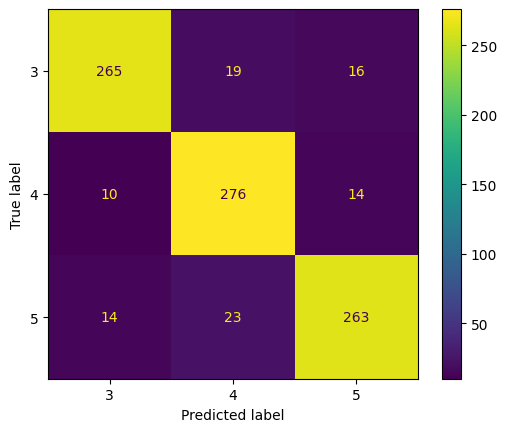

In [475]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_doc2vec_predict)

Luego, para el caso de las prediciones realizadas, se puede ver que el modelo falla en algunas ocasiones. Sin embargo, su mayor densidad se encuentra en la diagonal, por lo que le modelo esta siendo realmente positivo.

In [476]:
precision_doc2vec = precision_score(y_test, y_test_doc2vec_predict, average='weighted')
recall_doc2vec = recall_score(y_test, y_test_doc2vec_predict, average='weighted')
f1_doc2vec = f1_score(y_test, y_test_doc2vec_predict, average='weighted')

print("Precision:", precision_doc2vec)
print("Recall:", recall_doc2vec)
print("F1:", f1_doc2vec)

Precision: 0.8941634890348771
Recall: 0.8933333333333333
F1: 0.893349760424662


Para este caso, se puede ver que el error global rodan el 9% maso menos. Eso quiere decir, que el modelo esta siendo casi perfecto. Sin embargo, el error es tan pequeño que el modelo esta siendo muy bueno, sin importar las variables que se estan realizando

### 3.3.2 Doc2Vec Regresion Logisitca

In [477]:
# Crea un modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=5, max_iter=1000)

# Entrena el modelo con los vectores de características generados por Doc2Vec
logistic_model.fit(list(X_train['doc2vec_features']), y_train)

# Realiza predicciones en los datos de prueba
y_test_logistic_predict = logistic_model.predict(list(X_test['doc2vec_features']))

# Calcula las métricas de evaluación
precision_logistic = precision_score(y_test, y_test_logistic_predict, average='weighted')
recall_logistic = recall_score(y_test, y_test_logistic_predict, average='weighted')
f1_logistic = f1_score(y_test, y_test_logistic_predict, average='weighted')

print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1:", f1_logistic)

Precision: 0.9346829613662673
Recall: 0.9344444444444444
F1: 0.9344035005445288


En este punto lo que se esta haciendo, es primero el entreno de los datos. En este punto, seguimos probando con la vectorizacion de Doc2Vec. Se realiza el entreno el modelo para regresion logistica. Luego, se realiza la prediccion. Y por ultimo se obtuvo que los resultados en el error vuelve a hacer un poco menos el 8 %. Por lo que el modelo sigue siendo muy valido para su eleccion

### 3.3.3 Doc2Vec SVM

In [478]:
# Crea un modelo de Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=5)

# Entrena el modelo con los vectores de características generados por Doc2Vec
svm_model.fit(list(X_train['doc2vec_features']), y_train)

# Realiza predicciones en los datos de prueba
y_test_svm_predict = svm_model.predict(list(X_test['doc2vec_features']))

# Calcula las métricas de evaluación
precision_svm = precision_score(y_test, y_test_svm_predict, average='weighted')
recall_svm = recall_score(y_test, y_test_svm_predict, average='weighted')
f1_svm = f1_score(y_test, y_test_svm_predict, average='weighted')

print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 (SVM):", f1_svm)

Precision (SVM): 0.9389357014767794
Recall (SVM): 0.9388888888888889
F1 (SVM): 0.9388437962834819


En este punto lo que se esta haciendo, es primero el entreno de los datos. En este punto, seguimos probando con la vectorizacion de Doc2Vec. Se realiza el entreno el modelo para SVM. Luego, se realiza la prediccion. Y por ultimo se obtuvo que los resultados en el error vuelve a hacer un poco menos el 9 %. Por lo que el modelo sigue siendo muy valido para su eleccion

### 3.4 GloVe Vectorizacion

In [479]:
def glove_vectorize(text):
    doc = nlp(text)
    return doc.vector

En este punto se realiza la vectorizacion, es decir, se crea la función de vectorización

In [480]:
# Agrega una nueva columna de características a tus datos
X_train['glove_features'] = X_train["Textos_espanol"].apply(glove_vectorize)
X_test['glove_features'] = X_test["Textos_espanol"].apply(glove_vectorize)

Luego, en este punto, se realiza la division de los datos de entrenamiento y de prueba, basada en la funcion que se habia aplicado anteriormente.

### 3.4.1 Clasificacion Random Forest Classifier

In [481]:
# Crear un modelo RandomForestClassifier para GloVe
glove_model = RandomForestClassifier(random_state=4)
glove_model.fit(list(X_train['glove_features']), y_train)

RandomForestClassifier(random_state=4)

En este punto, se realiza el entrenamiento de los datos para aplicar la clasificacion.

In [482]:
# Predecir con el modelo de GloVe
y_train_glove_predict = glove_model.predict(list(X_train['glove_features']))
y_test_glove_predict = glove_model.predict(list(X_test['glove_features']))

En este punto se realiza la prediccion de los datos, para luego evaluarlos

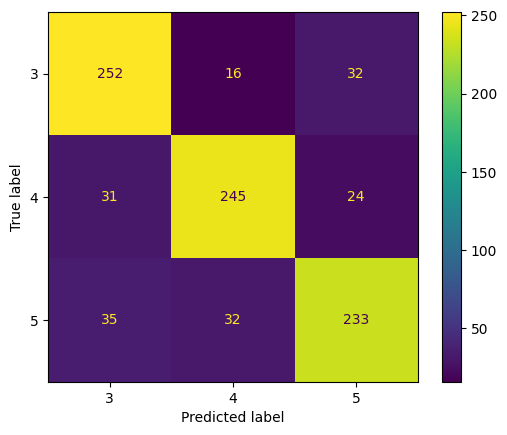

In [483]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_glove_predict)

En este momento, se puede decir, que es una clasificacion que falla mucho mas de lo que pueden llegar a fallar otras, que se realizaron anteriormente, pero es algo que se va a tocar mas adelante. Ahora bien, a pesar de fallar, tiene una muy buena densidad de datos en la diagonal que es lo que importa.

In [484]:
# Calcula métricas para el modelo de GloVe
precision_glove = precision_score(y_test, y_test_glove_predict, average='weighted')
recall_glove = recall_score(y_test, y_test_glove_predict, average='weighted')
f1_glove = f1_score(y_test, y_test_glove_predict, average='weighted')

print("Precision:", precision_glove)
print("Recall:", recall_glove)
print("F1:", f1_glove)

Precision: 0.8116195594312773
Recall: 0.8111111111111111
F1: 0.811004123886316


Para este punto, viendo los resultados, se puede decir que tiene una error de 18% aproximadamente. Por lo que es un modelo que esta bien, pero no estan preciso. Sin embargo, no esta tan mal como para descartarlo directamente. 

### 3.4.2 GloVe con Regresion logistica 

Precision (Logistic Regression): 0.9611219137002757
Recall (Logistic Regression): 0.9611111111111111
F1 (Logistic Regression): 0.9611147376643947


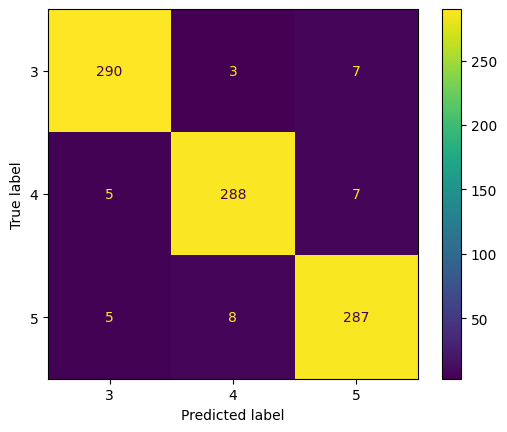

In [485]:
# Crear un modelo de Regresión Logística para GloVe
logistic_regression_model = LogisticRegression(random_state=4, max_iter=1000)

# Entrenar el modelo con las características de GloVe
logistic_regression_model.fit(list(X_train['glove_features']), y_train)

# Predecir con el modelo de Regresión Logística en los datos de entrenamiento y prueba
y_train_logistic_predict = logistic_regression_model.predict(list(X_train['glove_features']))
y_test_logistic_predict = logistic_regression_model.predict(list(X_test['glove_features']))

# Calcular la matriz de confusión en los datos de prueba
confusion_matrix_logistic = confusion_matrix(y_test, y_test_logistic_predict)

# Mostrar la matriz de confusión
ConfusionMatrixDisplay(confusion_matrix_logistic, display_labels=logistic_regression_model.classes_).plot(cmap='viridis')

# Calcular métricas para el modelo de Regresión Logística
precision_logistic = precision_score(y_test, y_test_logistic_predict, average='weighted')
recall_logistic = recall_score(y_test, y_test_logistic_predict, average='weighted')
f1_logistic = f1_score(y_test, y_test_logistic_predict, average='weighted')

print("Precision (Logistic Regression):", precision_logistic)
print("Recall (Logistic Regression):", recall_logistic)
print("F1 (Logistic Regression):", f1_logistic)

Como vemos, se realiza el modelo de regresion logistica, para la vectorización de GloVe. En este punto, se entran los datos con la vectorizacion antes definida. Luego, se realiza la prediccion y se realizaron la evaluacion e los datos. En este punto, se puede decir que es un modelo con un error menor al 3%, esto es muy bueno. Por lo que se podria ir planeteando como el elegido para generar la evaluacion mas adelante.

### 3.4.3 GloVe con SVM

In [486]:
# Crea un modelo de Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=5)

# Entrena el modelo con los vectores de características generados por Doc2Vec
svm_model.fit(list(X_train['glove_features']), y_train)

# Realiza predicciones en los datos de prueba
y_test_svm_predict = svm_model.predict(list(X_test['glove_features']))

# Calcula las métricas de evaluación
precision_svm = precision_score(y_test, y_test_svm_predict, average='weighted')
recall_svm = recall_score(y_test, y_test_svm_predict, average='weighted')
f1_svm = f1_score(y_test, y_test_svm_predict, average='weighted')

print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 (SVM):", f1_svm)

Precision (SVM): 0.9556019790048438
Recall (SVM): 0.9555555555555556
F1 (SVM): 0.9555235034083417


En este punto lo que se esta haciendo, es primero el entreno de los datos. En este punto, seguimos probando con la vectorizacion de GloVe. Se realiza el entreno el modelo para SVM. Luego, se realiza la prediccion. Y por ultimo se obtuvo que los resultados en el error vuelve a hacer un poco menos el 5 %. Por lo que el modelo sigue siendo muy valido para su eleccion.

# Modelo prediccion

Una vez se tienen en cuenta las vectorizaciones como el los modelos de clasificacion y sus matrices de evaluacion se va a tomar el mejor algoritmo y vectorizacion para llevar a cabo las predicciones en el excel sin etiquetas

El modelo que dio mejores resultados segun las metricas de evaluacion fue el vector TF-IDF con el algoritmo de clasificacion SVM, ya que este fue el mejor resultado se va a llevar a cabo la prediccion con este modelo

In [487]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)
X_tfidf = tfidf.fit_transform(X_train["Textos_espanol"])
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 15550


In [488]:
# Crea un modelo de Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=5)

# Entrena el modelo con los vectores de características generados por Doc2Vec
svm_model.fit(X_tfidf, y_train)

# Realiza predicciones en los datos de prueba
y_test_svm_predict = svm_model.predict(tfidf.transform(X_test["Textos_espanol"]))

# Calcula las métricas de evaluación
precision_svm = precision_score(y_test, y_test_svm_predict, average='weighted')
recall_svm = recall_score(y_test, y_test_svm_predict, average='weighted')
f1_svm = f1_score(y_test, y_test_svm_predict, average='weighted')

print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 (SVM):", f1_svm)

Precision (SVM): 0.9755766134943711
Recall (SVM): 0.9755555555555555
F1 (SVM): 0.9755533850811927


In [489]:
new_data = pd.read_excel('./data/SinEtiquetatest_cat_345 (1).xlsx')

In [490]:
new_data['Textos_espanol'] = new_data['Textos_espanol'].apply(contractions.fix) #Aplica la corrección de las contracciones

new_data['Textos_Tokenizados'] = new_data['Textos_espanol'].apply(contractions.fix)  # Aplica la corrección de las contracciones
new_data['Textos_Tokenizados'] = new_data['Textos_espanol'].apply(preprocessing)  # Aplica la eliminación del ruido
new_data['Textos_Tokenizados'] = new_data['Textos_espanol'].apply(word_tokenize)  # Tokeniza las palabras

new_data.head()

,Textos_espanol,sdg,Textos_Tokenizados
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN,"[Se, basa, en, los, nueve, años, de, educación, básica, (, seis, de, primaria, y, tres, de, secundaria, ), ., Los, alumnos, que, acceden, al, segundo, ciclo, de, secundaria, pueden, ir, a, un, centro, de, orientación, más, académica, o, a, un, centro, de, formación, profesional, ., Esto, se, aplica, tanto, en, el, sistema, islámico, como, en, el, no, islámico, ., La, enseñanza, secundaria, superior, formal, comprende, la, enseñanza, general, (, sekolah, menengah, atas, ,, o, SMA, ), ,, la, enseñanza, profesional, (, sekolah, menengah, kejuruan, ,, o, SMK, ), ,, las, escuelas, secundarias, superiores, islámicas, (, madrasah, aliyah, ,, o, MA, ...]"
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN,"[En, la, última, década, ,, y, en, particular, desde, 2010, ,, el, número, de, altas, per, cápita, ha, tendido, a, disminuir, ,, y, ahora, está, en, línea, con, la, media, de, la, OCDE, mencionada, anteriormente, ., Por, ejemplo, ,, los, habitantes, de, zonas, rurales, representan, el, 43, %, de, la, población, ,, pero, sólo, el, 32, %, de, las, altas, hospitalarias, ., A, falta, de, información, complementaria, ,, no, es, posible, determinar, si, esta, diferencia, indica, o, no, disparidades, en, el, acceso, de, las, poblaciones, rurales, y, ,, en, caso, afirmativo, ,, si, las, causas, son, geográficas, ,, culturales, o, ...]"
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloraciÃ³n del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconÃ³micas, por lo que el derecho a la igualdad de retribuciÃ³n por un trabajo de igual valor es una sÃntesis importante de las dos primeras dimensiones del derecho a la igualdad: reparar la desventaja y abordar el estigma y los estereotipos. Tanto el Comité de Derechos Económicos, Sociales y Culturales como el Comité para la Eliminación de la Discriminación contra la Muje

In [491]:
# Vectoriza los datos de prueba con el mismo vectorizador TF-IDF
X_test_tfidf = tfidf.transform(new_data["Textos_espanol"])

# Realiza predicciones en los datos de prueba
y_test_svm_predict = svm_model.predict(X_test_tfidf)

In [492]:
y_test_svm_predict

array([4, 3, 5, ..., 4, 3, 4], dtype=int64)

In [493]:
new_data['sdg'] = y_test_svm_predict
new_data.head()

,Textos_espanol,sdg,Textos_Tokenizados
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",4,"[Se, basa, en, los, nueve, años, de, educación, básica, (, seis, de, primaria, y, tres, de, secundaria, ), ., Los, alumnos, que, acceden, al, segundo, ciclo, de, secundaria, pueden, ir, a, un, centro, de, orientación, más, académica, o, a, un, centro, de, formación, profesional, ., Esto, se, aplica, tanto, en, el, sistema, islámico, como, en, el, no, islámico, ., La, enseñanza, secundaria, superior, formal, comprende, la, enseñanza, general, (, sekolah, menengah, atas, ,, o, SMA, ), ,, la, enseñanza, profesional, (, sekolah, menengah, kejuruan, ,, o, SMK, ), ,, las, escuelas, secundarias, superiores, islámicas, (, madrasah, aliyah, ,, o, MA, ...]"
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",3,"[En, la, última, década, ,, y, en, particular, desde, 2010, ,, el, número, de, altas, per, cápita, ha, tendido, a, disminuir, ,, y, ahora, está, en, línea, con, la, media, de, la, OCDE, mencionada, anteriormente, ., Por, ejemplo, ,, los, habitantes, de, zonas, rurales, representan, el, 43, %, de, la, población, ,, pero, sólo, el, 32, %, de, las, altas, hospitalarias, ., A, falta, de, información, complementaria, ,, no, es, posible, determinar, si, esta, diferencia, indica, o, no, disparidades, en, el, acceso, de, las, poblaciones, rurales, y, ,, en, caso, afirmativo, ,, si, las, causas, son, geográficas, ,, culturales, o, ...]"
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloraciÃ³n del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconÃ³micas, por lo que el derecho a la igualdad de retribuciÃ³n por un trabajo de igual valor es una sÃntesis importante de las dos primeras dimensiones del derecho a la igualdad: reparar la desventaja y abordar el estigma y los estereotipos. Tanto el Comité de Derechos Económicos, Sociales y Culturales como el Comité para la Eliminación de la Discriminación contra la Mujer ha

Despues de realizar la prediccion se guarda el documento de excel con las predicciones en otro excel distinto llamado resultados_prediccion_cat_345.xlsx

In [494]:
# Guarda el DataFrame en un nuevo archivo Excel
new_data.to_csv('./data/resultados_prediccion_cat_345.csv', index=False)

## Model Selection

In [495]:
"""
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4))
])
"""

'\npipeline = Pipeline(steps = [\n    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),\n    ("classifier", RandomForestClassifier(random_state=4))\n])\n'

In [496]:
"""
param_grid = {
    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [50, 100],
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": [25, 50, 75, 100]
}
"""

'\nparam_grid = {\n    "vectorizer": [CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words), TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)],\n    "vectorizer__lowercase": [True, False],\n    "classifier__n_estimators": [50, 100],\n    "classifier__criterion": [\'gini\', \'entropy\'],\n    "classifier__max_depth": [25, 50, 75, 100]\n}\n'

In [497]:
"""search = RandomizedSearchCV(pipeline, param_grid, n_iter=7, scoring=["precision", "recall", "f1"], refit="f1", cv=10, return_train_score=True, verbose=1, random_state=5)"""

'search = RandomizedSearchCV(pipeline, param_grid, n_iter=7, scoring=["precision", "recall", "f1"], refit="f1", cv=10, return_train_score=True, verbose=1, random_state=5)'

In [498]:
"""search.fit(X_train["Textos_espanol"], y_train)"""

'search.fit(X_train["Textos_espanol"], y_train)'

In [499]:
"""search.best_params_"""

'search.best_params_'

In [500]:
"""search.best_score_"""

'search.best_score_'

In [501]:
"""y_train_search_predict = search.best_estimator_.predict(X_train["Textos_espanol"])
y_test_search_predict = search.best_estimator_.predict(X_test["Textos_espanol"])"""

'y_train_search_predict = search.best_estimator_.predict(X_train["Textos_espanol"])\ny_test_search_predict = search.best_estimator_.predict(X_test["Textos_espanol"])'

In [502]:
"""print("Precision:", precision_score(y_train, y_train_search_predict,average='weighted'))
print("Recall:", recall_score(y_train, y_train_search_predict,average='weighted'))
print("F1:", f1_score(y_train, y_train_search_predict,average='weighted'))"""

'print("Precision:", precision_score(y_train, y_train_search_predict,average=\'weighted\'))\nprint("Recall:", recall_score(y_train, y_train_search_predict,average=\'weighted\'))\nprint("F1:", f1_score(y_train, y_train_search_predict,average=\'weighted\'))'

In [503]:
"""print("Precision:", precision_score(y_test, y_test_search_predict,average='weighted'))
print("Recall:", recall_score(y_test, y_test_search_predict,average='weighted'))
print("F1:", f1_score(y_test, y_test_search_predict,average='weighted'))"""

'print("Precision:", precision_score(y_test, y_test_search_predict,average=\'weighted\'))\nprint("Recall:", recall_score(y_test, y_test_search_predict,average=\'weighted\'))\nprint("F1:", f1_score(y_test, y_test_search_predict,average=\'weighted\'))'